In [1]:
import pandas as pd
import numpy as np

# Tratar os participantes

In [2]:
df_meetings = pd.read_csv("./data/silver/df_matched.csv")
df_register = pd.read_excel(
    r"D:\OneDrive\UFPR\00.PPGCP\00. Doutorado\Tese\Base de dados\Transparency register\Organisations in Transparency Register-2024-JAN.xls"
)

# Tratar dados do registro

In [3]:
df_register.columns

Index(['Identification code', 'Registration date', 'Category of registration',
       'Name', 'Acronym', 'Form of the entity', 'Website URL',
       'Head office address', 'Head office post code', 'Head office post box',
       'Head office city', 'Head office country', 'Head office phone',
       'EU office address', 'EU office post code', 'EU office post box',
       'EU office city', 'EU office country', 'EU office phone', 'Goals',
       'Level of interest', 'EU legislative proposals/policies',
       'Communication activities', 'Intergroups and unofficial groupings',
       'Unoffical Groups', 'Expert Groups',
       'Participation in other EU supported forums and platforms',
       'Members 10%', 'Members 25%', 'Members 50%', 'Members 75%',
       'Members 100%', 'Members', 'Members FTE',
       'Members Complementary information', 'Number of EP acredited Person',
       'Fields of interest',
       'Is member of: List of associations, (con)federations, networks or other bodies o

## Categorias

In [4]:
cat_mapper = {
    "Non-governmental organisations, platforms and networks and similar": "NGOs",
    "Trade and business associations": "Business",
    "Companies & groups": "Business",
    "Other organisations, public or mixed entities": "Other",
    "Trade unions and professional associations": "Other",
    "Self-employed individuals": "Other",
    "Think tanks and research institutions": "Other",
    "Professional consultancies": "Other",
    "Academic institutions": "Other",
    "Associations and networks of public authorities": "Other",
    "Organisations representing churches and religious communities": "Other",
    "Law firms": "Other",
    "Entities, offices or networks established by third countries": "Other",
}


df_register["category"] = df_register["Category of registration"].apply(
    lambda x: cat_mapper.get(x)
)

df_register.groupby("category").size()

category
Business    5770
NGOs        3480
Other       3218
dtype: int64

##  Fields of INterests

In [5]:
field_to_topic = {
    "Single market": "economics and trade",
    "Employment and social affairs": "health",
    "International co-operation and development": "foreign and security affairs",
    "Maritime affairs and fisheries": "agriculture",
    "Trade": "economics and trade",
    "Regional policy": "infrastructure and industry",
    "Communication": "technology",
    "Education and training": "education",
    "Youth": "education",
    "Trans-European Networks": "infrastructure and industry",
    "Justice and fundamental rights": "human rights",
    "Customs": "economics and trade",
    "Business and industry": "infrastructure and industry",
    "Economy": "economics and trade",
    "Research and innovation": "technology",
    "Humanitarian aid and civil protection": "foreign and security affairs",
    "European neighbourhood policy": "foreign and security affairs",
    "External relations": "foreign and security affairs",
    "Fraud prevention": "economics and trade",
    "Competition": "economics and trade",
    "Environment": "environment and climate",
    "Culture and media": "education",
    "Institutional affairs": "foreign and security affairs",
    "Digital economy and society": "technology",
    "Banking and financial services": "economics and trade",
    "Climate action": "environment and climate",
    "Energy": "infrastructure and industry",
    "Culture": "education",
    "Food safety": "agriculture",
    "Borders and security": "foreign and security affairs",
    "Taxation": "economics and trade",
    "Consumers": "economics and trade",
    "Enlargement": "foreign and security affairs",
    "Sport": "education",
    "Agriculture and rural development": "agriculture",
    "Transport": "infrastructure and industry",
    "Migration and asylum": "foreign and security affairs",
    "finance and the euro": "economics and trade",
    "Public health": "health",
    "Budget": "economics and trade",
    "Foreign affairs and security policy": "foreign and security affairs",
}

len(field_to_topic)

41

In [6]:
def find_topics(field):
    field_list = field.split(", ")
    return [field_to_topic[f] for f in field_list if f in field_to_topic]


df_register["topic"] = df_register["Fields of interest"].apply(find_topics)

In [7]:
# Create dummies for the topic column (which contains lists)
topic_dummies = df_register["topic"].explode().str.get_dummies().groupby(level=0).max()

# Concatenate the original dataframe with the topic dummies
df_register = pd.concat([df_register, topic_dummies], axis=1)

In [8]:
topic_dummies

,agriculture,economics and trade,education,environment and climate,foreign and security affairs,health,human rights,infrastructure and industry,technology
0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,1,1,1,1,1
3,0,1,0,1,1,0,0,1,1
4,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
12463,0,0,0,1,0,0,0,1,1
12464,0,1,1,0,1,1,0,1,1
12465,0,0,0,1,0,0,0,1,1
12466,0,1,0,1,0,0,1,1,0


## Budget

In [9]:
bt = []
for costs in df_register["Annual costs for registers activity or total budget"].unique():
    buget =  [int(n) if n.isdigit() else -1 for n in str(costs).split("-")]
    if len(buget) == 1:
        buget = [buget[0], buget[0]]
    bt.append({
        "min": min(buget),
        "max": max(buget),
        "costs": costs,
        "total": df_register[df_register["Annual costs for registers activity or total budget"] == costs].shape[0]
    })
bt = pd.DataFrame(bt, columns=["min", "max", "costs", "total"])

In [10]:
bt.sort_values("max", ascending=True, inplace=True)
bt["cum_total"] = bt["total"].cumsum()
bt["cum_total_perc"] = bt["cum_total"] / bt["cum_total"].max()
bt['ln_max'] = np.log(bt['max'] + 1)

C:\Users\caca_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='ln_max'>

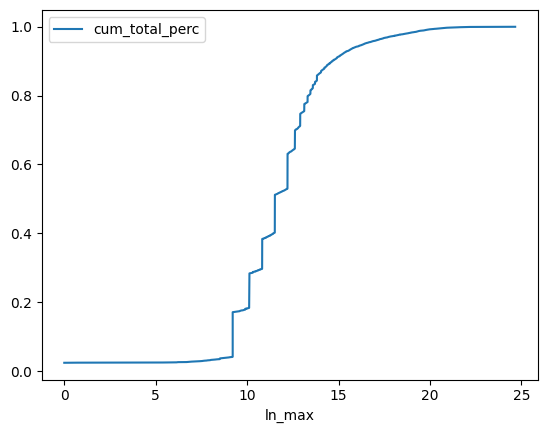

In [11]:
bt.plot(kind="line", x="ln_max", y="cum_total_perc")

In [12]:
df_budget = df_register[
    ["Identification code", "Annual costs for registers activity or total budget"]
].merge(
    bt,
    left_on="Annual costs for registers activity or total budget",
    right_on="costs",
    how="left",
)

df_budget

,Identification code,Annual costs for registers activity or total budget,min,max,costs,total,cum_total,cum_total_perc,ln_max
0,861854150361-39,50000-99999,50000,99999,50000-99999,1267,6298,0.508642,11.512925
1,680025443289-14,14201,14201,14201,14201,1,2152,0.173801,9.561138
2,610631350643-79,300000-399999,300000,399999,300000-399999,393,9213,0.744064,12.899220
3,381757951712-94,200000-299999,200000,299999,200000-299999,594,8593,0.693991,12.611538
4,625735349859-48,212432,212432,212432,212432,1,7838,0.633016,12.266382
...,...,...,...,...,...,...,...,...,...
12463,337560545534-33,50000-99999,50000,99999,50000-99999,1267,6298,0.508642,11.512925
12464,87872442953-08,546194,546194,546194,546194,1,9636,0.778226,13.210731
12465,241758149207-72,25000-49999,25000,49999,25000-49999,1001,4690,0.378776,10.819778
12466,285222847712-43,300000-399999,300000,399999,300000-399999,393,9213,0.744064,12.899220


# DF registrados

In [13]:
columns_to_keep = [
    "Identification code",
    "Registration date",
    "category",
    "Head office country",
]
df_register[columns_to_keep]

df_lobbyists = pd.concat([df_register[columns_to_keep], topic_dummies], axis=1)

df_lobbyists = df_lobbyists.merge(
    df_budget[["Identification code", "ln_max"]],
    on="Identification code",
    how="left",
    suffixes=("_register", "_budget"),
)

In [14]:
rename_columns = {
    "Identification code": "lobbyist_id",
    "Registration date": "l_registration_date",
    "category": "l_category",
    "Head office country": "l_head_office_country",
    "agriculture": "l_agriculture",
    "economics and trade": "l_economics_and_trade",
    "education": "l_education",
    "environment and climate": "l_environment_and_climate",
    "foreign and security affairs": "l_foreign_and_security_affairs",
    "health": "l_health",
    "human rights": "l_human_rights",
    "infrastructure and industry": "l_infrastructure_and_industry",
    "ln_max": "l_ln_max_budget",
    "technology": "l_technology",
}
df_lobbyists.rename(columns=rename_columns, inplace=True)

In [15]:
df_lobbyists

,lobbyist_id,l_registration_date,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,l_technology,l_ln_max_budget
0,861854150361-39,02/06/2023,NGOs,POLAND,0,0,1,0,0,0,0,0,0,11.512925
1,680025443289-14,23/06/2021,NGOs,HUNGARY,1,1,1,0,0,0,1,0,1,9.561138
2,610631350643-79,30/06/2023,Business,BELGIUM,1,1,1,1,1,1,1,1,1,12.899220
3,381757951712-94,07/11/2023,Business,SWEDEN,0,1,0,1,1,0,0,1,1,12.611538
4,625735349859-48,18/04/2023,NGOs,FRANCE,0,0,1,1,1,1,1,0,0,12.266382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12463,337560545534-33,15/02/2022,Business,UNITED STATES,0,0,0,1,0,0,0,1,1,11.512925
12464,87872442953-08,06/01/2010,NGOs,BELGIUM,0,1,1,0,1,1,0,1,1,13.210731
12465,241758149207-72,23/02/2023,Business,SPAIN,0,0,0,1,0,0,0,1,1,10.819778
12466,285222847712-43,23/09/2022,Business,SPAIN,0,1,0,1,0,0,1,1,0,12.899220


# Adicionar dados das reuniões

In [16]:
columns_to_keep = [
    "member_id",
    "meeting_date",
    "member_capacity",
    "Identification code",
]

# Exclude some knows mismatches

df_meetings_filtered = df_meetings[
    (df_meetings["Identification code"] != "655637920614-19")
    & (df_meetings["Identification code"] != "194195843361-94")
]


df_meetings_filtered = df_meetings_filtered[columns_to_keep]

In [17]:
df_final = df_meetings_filtered.merge(
    df_lobbyists, left_on="Identification code", right_on="lobbyist_id", how="left"
)

del df_final["Identification code"]

# df_final.to_csv("./data/silver/df_final.csv", index=False)

## Days since registration and meeting_date

In [18]:
df_final["meeting_date"] = pd.to_datetime(df_final["meeting_date"])
df_final["l_registration_date"] = pd.to_datetime(df_final["l_registration_date"], format="%d/%m/%Y")

df_final["l_days_since_registration"] = (
    df_final["meeting_date"] - df_final["l_registration_date"]
)

In [19]:
df_final["l_days_since_registration"].dt.days.describe()

count    40343.000000
mean      3107.581960
std       1818.637028
min      -1551.000000
25%       1599.500000
50%       3477.000000
75%       4642.500000
max       5948.000000
Name: l_days_since_registration, dtype: float64

<Axes: >

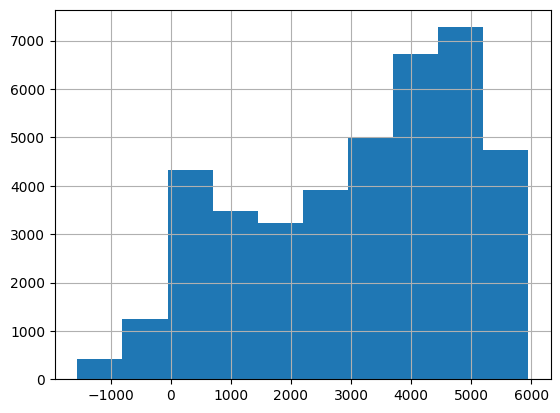

In [20]:
df_final["l_days_since_registration"].dt.days.hist()

In [21]:
df_final["l_days_since_registration"] = df_final["l_days_since_registration"].dt.days
del df_final['l_registration_date']

# FInal

In [22]:
df_final["member_id"] = df_final["member_id"].apply(lambda x: f"person/{int(x)}")
df_final.to_csv("./data/silver/df_meetings_lobbyists.csv", index=False)